In [1]:
import os
os.chdir("..")

In [2]:
import time
#basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import spacy 
#word modeling
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA 
from sklearn.decomposition import FactorAnalysis 
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from gensim.parsing.preprocessing import remove_stopwords
import nltk

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings('ignore',message="Precision")
from imblearn.over_sampling import SVMSMOTE, SMOTE, BorderlineSMOTE, RandomOverSampler, KMeansSMOTE, ADASYN

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from gensim.parsing.preprocessing import remove_stopwords

from nltk.corpus import stopwords
from src.preprocess import replace_stopwords


In [3]:
def heatconmat(y_true, y_pred):
    sns.set_context('talk')
    plt.figure(figsize=(4,4))
    sns.heatmap(confusion_matrix(y_true,y_pred),
                annot=True,
                fmt='d',
                cbar=False,
                cmap='gist_earth_r')
    plt.show()
    print(classification_report(y_true,y_pred))

In [4]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


In [5]:
n_features = 2000
n_top_words = 20

# load data


In [40]:
train_docs = pd.read_csv('extracted/dataframes/steam_australia.csv', 
                         names=["id", "funny", "helpful", "recommend",
                               "polarity", "positive", "subjectivity", "review"],
                        header=None).reset_index(drop=True)[1:]
recommend_indices = [i for i, x in enumerate(np.array(train_docs["recommend"])) if type(x) == str]
train_docs

id                             funny  \
1      76561197970982479                               NaN   
2      76561197970982479                               NaN   
3      76561197970982479                               NaN   
4                js41637                               NaN   
5                js41637                               NaN   
...                  ...                               ...   
59301  76561198312638244                               NaN   
59302  76561198312638244                               NaN   
59303        LydiaMorley  1 person found this review funny   
59304        LydiaMorley                               NaN   
59305        LydiaMorley                               NaN   

                                               helpful recommend  \
1                                       No ratings yet         1   
2                                       No ratings yet         1   
3                                       No ratings yet         1   
4      15 of 20 people (75%) found this review helpful         1   
5         0 of 1 people (0%) found this review helpful         1   
...                                                ...       ...   
59301                                   No ratings yet         1   
59302                                   No ratings yet         1   
59303    1 of 2 people (50%) found this review helpful         1   
59304                                   No ratings yet         1   
59305                                   No ratings yet         1   

                   polarity positive         subjectivity  \
1       0.17444444444444446     True   0.3796031746031746   
2                    0.3375     True                 0.55   
3       0.04999999999999999    False               0.4125   
4       0.11458333333333336     True   0.6604166666666667   
5      -0.03611111111111112    False  0.37800453514739235   
...                     ...      ...                  ...   
59301   0.23333333333333334     True  0.13333333333333333   
59302   0.14250000000000004     True               0.4425   
59303   0.08750000000000001    False   0.3833333333333333   
59304                   1.0     True                  1.0   
59305                  0.65     True                  0.6   

                                                  review  
1      Simple yet with great replayability. In my opi...  
2                   It's unique and worth a playthrough.  
3      Great atmosphere. The gunplay can be a bit chu...  
4      I know what you think when you see this title ...  
5      For a simple (it's actually not all that simpl...  
...                                                  ...  
59301  a must have classic from steam definitely wort...  
59302  this game is a perfect remake of the original ...  
59303  had so much fun plaing this and collecting res...  
59304                                                 :D  
59305                                     so much fun :D  

[59305 rows x 8 columns]

## Removing stopwords

Stopwords have not been removed yet because they can be in a game's name. Those are defined now and should be Capitalized and with underscores (if it is the case), so their stopwords are safe

In [44]:
spacy_nlp = spacy.load('en_core_web_lg')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
stop_words = set(list(set(stopwords.words('english'))) + list(spacy_stopwords))

train_docs["review"] = np.array([" ".join(replace_stopwords(str(w), stop_words)) for w in np.array(train_docs["review"])])

## Define valid / train

In [45]:
data_samples = np.array(train_docs['review'][recommend_indices])
true_y = np.array(np.array(train_docs["recommend"])[recommend_indices], dtype=int)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Verify that Team_Fortress_2 is in the vocabulary (verify the normalization did not make mistakes)

In [43]:
for i, text in enumerate(data_samples):
    text = str(text)
    
    if "dota" in text:
        print(i, text)

2269 pros hats free play strong community graphics caricatures bunch unregenerated contents lifetime support updates confirmed hats sick lack tribute id quake players means inevitably kids toxic players statistically remarks preordered orange box watched start Team_Fortress_2 tfc Evolved perpetual thingy valves flagship economically experimentally successful multilayer game course dotal cso risen stand pretty surpassed realize monumental game seemingly gammers valve steam achievement later drop system hats introduced tfc remember hat phenomenon place wanted fancy fedora fun story game guy soursop known drunken fl got making idling tool tfc cheating event item known golden wrench including people idling tool got hats items Taken_Away active tfc players awarded halo hats tool ban soursop guy lifted officially started working valve tfc backpack guy talent valve definitely knew decided hire spite violations user agreements steam user Reminds_Me fbi hiring genius financial fauster movie dra

In [9]:
#shuffled_indices = list(range(len(true_y)))
#np.random.shuffle(shuffled_indices)
#data_samples = data_samples[shuffled_indices]
#true_y = true_y[shuffled_indices]
def lda_cv(model, data_samples, true_y, n_features, tol=0.001, cv=3, verbose=0, nc=1, min_df=5, smote=False):
    t0 = time()
    models = []
    valid_acc = []
    valid_ys = []
    valid_arrr = []
    train_arrr = []
    train_acc = []

    for c in range(cv):
        if verbose > 0:
            print("CV: {}/{}".format(str(c+1), str(cv)))
        ind_from = int((len(data_samples) / cv) * c)
        ind_to = int((len(data_samples) / cv ) * (c+1))
        if c == cv-1:
            ind_to = -1
        if verbose > 2:
            print("Valid samples from", ind_from, "to", ind_to)
        valid_samples = data_samples[ind_from:ind_to]
        train_samples = np.concatenate((data_samples[:ind_from].astype("<U14000"), data_samples[ind_to:].astype("<U14000")))
        valid_y = true_y[ind_from:ind_to].astype(int)
        train_y = np.concatenate((true_y[:ind_from],true_y[ind_to:])).astype(int)
        print(valid_y.shape)
        print(train_y.shape)
        assert len(data_samples) == len(train_samples) + len(valid_samples)
        tfidf_vectorizer = CountVectorizer(max_df=0.95, min_df=min_df,
                                           max_features=n_features,
                                           stop_words='english')
        tfidf_vectorizer.fit(train_samples.astype('U'))
        train_data  = tfidf_vectorizer.transform(train_samples.astype('U')).toarray()
        valid_data  = tfidf_vectorizer.transform(valid_samples.astype('U')).toarray()
        if verbose > 2:
            print("Vectorizing done in %0.3fs." % (time() - t0))
        if smote:
            sm = SMOTE(random_state=42, n_jobs=-1)
            train_data, train_y = sm.fit_resample(train_data, train_y)


        flda = model(tol=0.001)
        t0 = time()
        flda.fit(train_data.astype(np.float32), train_y.astype(int))
        if verbose > 2:
            print("Linear Discriminant Analysis done in %0.3fs." % (time() - t0))

        predict_y_train = flda.predict(train_data)
        predict_y_valid = flda.predict(valid_data)
        train_arr = np.concatenate((predict_y_train.reshape([-1, 1]), train_y.reshape([-1, 1])), 1)
        valid_arr = np.concatenate((predict_y_valid.reshape([-1, 1]), valid_y.reshape([-1, 1])), 1)
        
        valid_ys += [valid_y]
        train_arrr += [train_arr]
        valid_arrr += [valid_arr]
        train_total = len(train_arr)
        valid_total = len(valid_arr)
        train_corrects = [i for i, x in enumerate(train_arr) if x[0] == x[1]]
        train_accuracy = len(train_corrects)/train_total
        valid_corrects = [i for i, x in enumerate(valid_arr) if x[0] == x[1]]
        valid_accuracy = len(valid_corrects)/valid_total
        if verbose > 1:
            print("Model Train accuracy:", len(train_corrects), "/", train_total, train_accuracy)
            print("Predict Train only Recommended accuracy:", np.sum(train_y), "/", total, np.sum(train_y)/train_total)
            print("Model Train accuracy:", len(train_corrects), "/", valid_total, valid_accuracy)
            print("Predict Predict only Recommended accuracy:", np.sum(valid_y), "/", valid_total, np.sum(valid_y)/valid_total)
        train_acc += [train_accuracy]
        valid_acc += [valid_accuracy]        
        models += [flda]
    return models, train_acc, valid_acc, train_arrr, valid_arrr

valid_arr_100_lda = np.concatenate(valid_arr_100_lda)

In [10]:
model = LinearDiscriminantAnalysis
models_100_lda, train_accuracies_100_lda, valid_accuracies_100_lda, \
    train_arr_100_lda, valid_arr_100_lda  = lda_cv(model, data_samples, true_y, 
                                                   n_features=100, cv=3, verbose=1)
models_500_lda, train_accuracies_500_lda, valid_accuracies_500_lda, \
    train_arr_500_lda, valid_arr_500_lda  = lda_cv(model, data_samples, true_y, 
                                                   n_features=500, cv=3, verbose=1)
models_1000_lda, train_accuracies_1000_lda, valid_accuracies_1000_lda, \
    train_arr_1000_lda, valid_arr_1000_lda  = lda_cv(model, data_samples, true_y, 
                                                   n_features=1000, cv=3, verbose=1)
models_2000_lda, train_accuracies_2000_lda, valid_accuracies_2000_lda, \
    train_arr_2000_lda, valid_arr_2000_lda  = lda_cv(model, data_samples, true_y, 
                                                   n_features=2000, cv=3, verbose=1)
#models_5000_lda, train_accuracies_5000_lda, valid_accuracies_5000_lda, \
#    train_arr_5000_lda, valid_arr_5000_lda  = lda_cv(model, data_samples, true_y, 
#                                                   n_features=5000, cv=3, verbose=1)
#models_10000_lda, train_accuracies_10000_lda, valid_accuracies_10000_lda, \
#    train_arr_10000_lda, valid_arr_10000_lda  = lda_cv(model, data_samples, true_y, 
#                                                   n_features=10000, cv=3, verbose=1)


CV: 1/3
(19768,)
(39537,)
CV: 2/3
(19768,)
(39537,)
CV: 3/3
(19768,)
(39537,)
CV: 1/3
(19768,)
(39537,)
CV: 2/3
(19768,)
(39537,)
CV: 3/3
(19768,)
(39537,)
CV: 1/3
(19768,)
(39537,)
CV: 2/3
(19768,)
(39537,)
CV: 3/3
(19768,)
(39537,)
CV: 1/3
(19768,)
(39537,)
CV: 2/3
(19768,)
(39537,)
CV: 3/3
(19768,)
(39537,)


In [11]:
zeros = np.zeros(len(train_accuracies_1000_lda), dtype=np.int)
ones = np.ones(len(train_accuracies_1000_lda), dtype=np.int)
zeros_ones = np.concatenate((zeros, ones), 0).reshape([-1, 1])
zeros_ones.shape
ones1 = np.ones(len(zeros_ones), dtype=np.int).reshape([-1, 1])

In [12]:
accuracies_100_lda = np.concatenate((np.array(train_accuracies_100_lda).reshape([-1, 1]), 
                                  np.array(valid_accuracies_100_lda).reshape([-1, 1])), 0)
accuracies_100_lda = np.concatenate((zeros_ones, ones1 * 100, accuracies_100_lda), 1)
accuracies_500_lda = np.concatenate((np.array(train_accuracies_500_lda).reshape([-1, 1]), 
                                  np.array(valid_accuracies_500_lda).reshape([-1, 1])), 0)
accuracies_500_lda = np.concatenate((zeros_ones, ones1 * 500, accuracies_500_lda), 1)
accuracies_1000_lda = np.concatenate((np.array(train_accuracies_1000_lda).reshape([-1, 1]), 
                                  np.array(valid_accuracies_1000_lda).reshape([-1, 1])), 0)
accuracies_1000_lda = np.concatenate((zeros_ones, ones1 * 1000, accuracies_1000_lda), 1)

accuracies_2000_lda = np.concatenate((np.array(train_accuracies_2000_lda).reshape([-1, 1]), 
                                  np.array(valid_accuracies_2000_lda).reshape([-1, 1])), 0)
accuracies_2000_lda = np.concatenate((zeros_ones, ones1 * 2000, accuracies_2000_lda), 1)

#accuracies_5000_lda = np.concatenate((np.array(train_accuracies_5000_lda).reshape([-1, 1]), 
#                                  np.array(valid_accuracies_5000_lda).reshape([-1, 1])), 0)
#accuracies_5000_lda = np.concatenate((zeros_ones, ones1 * 5000, accuracies_5000_lda), 1)

#accuracies_10000_lda = np.concatenate((np.array(train_accuracies_10000_lda).reshape([-1, 1]), 
#                                  np.array(valid_accuracies_10000_lda).reshape([-1, 1])), 0)
#accuracies_10000_lda = np.concatenate((zeros_ones, ones1 * 10000, accuracies_10000_lda), 1)


accuracies_lda = np.concatenate((accuracies_100_lda, 
                             accuracies_500_lda, 
                             accuracies_1000_lda, 
                             accuracies_2000_lda,
#                             accuracies_5000_lda,
#                             accuracies_10000_lda
                                ), 0)
accuracies_lda = pd.DataFrame(accuracies_lda, columns=["valid", "group", "acc"])

# Precision

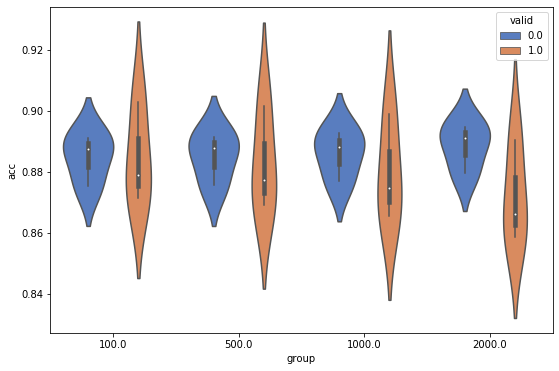

In [13]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=[9, 6])
g = sns.violinplot(x="group", y="acc", 
                   hue="valid", data=accuracies_lda, 
                   palette="muted")
plt.show()

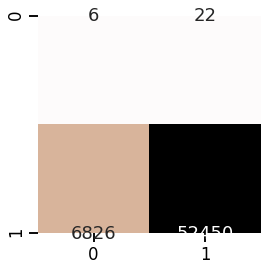

              precision    recall  f1-score   support

           0       0.00      0.21      0.00        28
           1       1.00      0.88      0.94     59276

    accuracy                           0.88     59304
   macro avg       0.50      0.55      0.47     59304
weighted avg       1.00      0.88      0.94     59304



In [14]:
valid_arr_100_lda = np.concatenate((valid_arr_100_lda))
heatconmat(valid_arr_100_lda[:,0], valid_arr_100_lda[:,1])

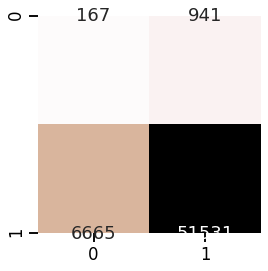

              precision    recall  f1-score   support

           0       0.02      0.15      0.04      1108
           1       0.98      0.89      0.93     58196

    accuracy                           0.87     59304
   macro avg       0.50      0.52      0.49     59304
weighted avg       0.96      0.87      0.91     59304



In [16]:
valid_arr_2000_lda = np.concatenate((valid_arr_2000_lda))
heatconmat(valid_arr_2000_lda[:,0], valid_arr_2000_lda[:,1])

In [ ]:
fig, ax = plt.subplots()
ax.bar([0,1], [len(df_y["true"]) - np.sum(df_y["true"]), np.sum(df_y["true"])])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Recommended", "Recommended"])
ax.grid(False)

Predicting too many recommendations because of the bias in the data (Need to rectify)

In [ ]:
sns.set(style="whitegrid")
n_true_recommend = sum(df_y["true"])
n_true_preds = sum(df_y["predictions"])
n_false_recommend = len(df_y["true"]) - n_true_recommend
n_false_preds = len(df_y["predictions"]) - n_true_preds
x = np.array([0, 1])

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [n_false_recommend, n_true_recommend], width, label='true')
rects2 = ax.bar(x + width/2, [n_false_preds, n_true_preds], width, label='predictions')
ax.set_xticks(x)
ax.set_xticklabels(["Not Recommended", "Recommended"])
ax.legend()
ax.grid(False)

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data_samples.astype('U'))
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=1,
                                max_features=n_features,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(data_samples.astype('U'))



In [22]:
all_data = tf.toarray()
flda = LinearDiscriminantAnalysis(n_components=1, tol=0.001)
flda.fit(all_data, true_y)
z = flda.transform(all_data)
predictions = flda.predict(all_data)
df_y = pd.DataFrame(np.concatenate((predictions.reshape(-1, 1), true_y.reshape(-1, 1), z.reshape(-1, 1)),1), columns=["predictions", "true", "z"])
df_y

predictions  true         z
0              1.0   1.0  0.127522
1              1.0   1.0  0.897196
2              1.0   1.0 -0.036705
3              1.0   1.0  0.542101
4              1.0   1.0 -0.589782
...            ...   ...       ...
59300          1.0   1.0 -0.018208
59301          1.0   1.0  0.318958
59302          1.0   1.0 -1.748863
59303          1.0   1.0  0.055282
59304          1.0   1.0  0.017847

[59305 rows x 3 columns]

In [23]:
tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names()).reshape([-1, 1])
coefs = flda.coef_.reshape([-1, 1])
coefs = pd.DataFrame(np.concatenate((coefs, tfidf_feature_names), 1), columns=["coef", "feature_name"])
coefs

coef feature_name
0     -0.004729242348332834         1080
1       -0.8164766768122469           14
2       0.04579993559259252           16
3        0.2575771892467669          1st
4       0.11433999132048359           2d
...                     ...          ...
1995    -0.2900740749789162     your_own
1996    0.09049821921519392        youre
1997    0.10209121011894237        youve
1998    0.10217179536150414       zombie
1999   -0.17614953468446803      zombies

[2000 rows x 2 columns]

Recommendation distribution

In [26]:
coefs["coef"] = np.array(coefs["coef"], dtype=np.float32)
coefs = coefs.sort_values(by=['coef'])
coefs[:50]

coef          feature_name
726  -1.684551               gammers
1334 -1.019055                  plan
77   -1.002141               animals
1360 -0.986520              polished
293  -0.945805                   chu
708  -0.930012           frustrating
1556 -0.907278                seeing
1883 -0.901851                 value
44   -0.893645                 admit
1277 -0.875959            overpriced
1003 -0.827859                  lack
1613 -0.827795                 skill
1860 -0.823237            unplayable
1233 -0.820014               noticed
171  -0.818538                bespew
1    -0.816477                    14
1128 -0.792859               meaning
54   -0.789466                aiming
430  -0.784615               defence
1553 -0.782737                second
790  -0.773733                  guns
1046 -0.747971                  like
1975 -0.747525                 wrong
599  -0.743479               excited
137  -0.742931             bad_thing
239  -0.723448               buttons
1239 -0.722753               objects
640  -0.721794                  fast
208  -0.716724                bother
500  -0.716082               driving
505  -0.714724                  dude
1544 -0.702046                school
1298 -0.685996               patches
538  -0.680709                empire
637  -0.661090               far_cry
495  -0.660197                dragon
1067 -0.659286                 local
1937 -0.656117                   wei
1445 -0.649314                 ready
1777 -0.635361              thinking
21   -0.612219               account
688  -0.610618                forces
438  -0.610319                 deota
1858 -0.607927              unlocked
1189 -0.606534             more_than
109  -0.604900                asking
294  -0.594412                 cinda
670  -0.586496  first_person_shooter
124  -0.585119            australian
860  -0.582740                  hits

In [ ]:
coefs = coefs.sort_values(by=['coef'], ascending=False)
coefs[:20]

In [83]:
means = flda.means_
means_df = pd.DataFrame(np.concatenate((means.reshape([1000, -1]), tfidf_feature_names), 1),
                        columns=["bad_reference", "good_reference", "feature_name"])

means_df["bad_reference"] = np.array(means_df["bad_reference"], dtype=np.float32)
means_df = means_df.sort_values(by=['bad_reference'], ascending=False)
means_df[:n_top_words]

bad_reference         good_reference feature_name
687       0.046736   0.010275304623105863     problems
187       0.041719   0.010262751546499378        crash
0         0.034268  0.0008233198584713345         1080
500       0.033768  0.0014022020304012652           le
532       0.024715  0.0050441333591735495         loot
32        0.022258   0.004364111696715747           ai
769       0.018860   0.002633127239622992       series
520       0.018267  0.0010749576591177065    literally
675       0.017555  0.0017350457484507315     possible
269       0.017543    0.00275867489554648       engine
175       0.017264  0.0017925598913841702   controller
859       0.016786  0.0030954921172576056       taking
798       0.015394  0.0011951920950139467        skins
359       0.014911   0.003435709438112744      getting
20        0.014388  0.0009641220526850001     actually
298       0.014247  0.0017462300088793585         face
332       0.011631   0.001987110359720639         form
832       0.011519  0.0016716168945340008         stay
670       0.011299  0.0011036702855401449       points
491       0.010251  0.0015609294381000042         lack

In [84]:
means_df["good_reference"] = np.array(means_df["good_reference"], dtype=np.float32)
means_df = means_df.sort_values(by=['good_reference'], ascending=False)
means_df[:n_top_words]

bad_reference  good_reference feature_name
673       0.001262        0.108178         port
173       0.000946        0.104513     continue
671       0.000936        0.039039         poor
689       0.007669        0.033976         pros
171       0.000594        0.032430   constantly
189       0.007232        0.031064        crazy
829       0.001157        0.030087     starting
541       0.001164        0.029581          mac
329       0.001318        0.029082         food
256       0.000560        0.028327          ego
756       0.000871        0.027254       school
41        0.000904        0.027216       amigos
119       0.001374        0.016470         came
557       0.001179        0.016371        match
57        0.001438        0.016173      aspects
330       0.000899        0.015233      forever
830       0.000717        0.015021       starts
619       0.001283        0.014689           op
943       0.000954        0.013638         wait
443       0.000996        0.013510          ign

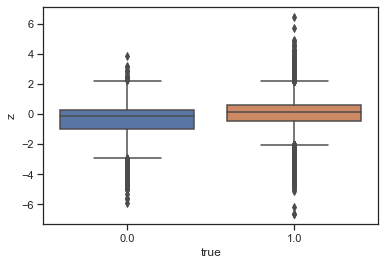

In [85]:
sns.set(style="ticks", color_codes=True)
sns.boxplot(x="true", y="z", data=df_y);

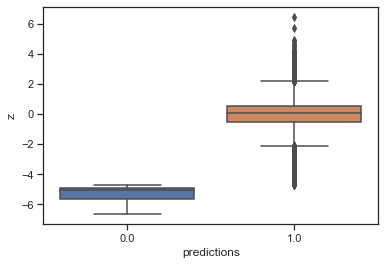

In [86]:
sns.set(style="ticks", color_codes=True)
sns.boxplot(x="predictions", y="z", data=df_y);

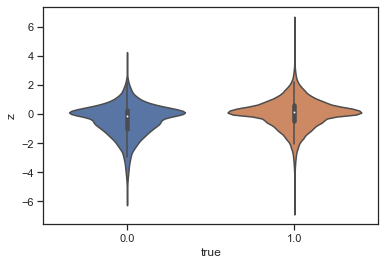

In [87]:
sns.set(style="ticks", color_codes=True)
sns.violinplot(x="true", y="z", data=df_y);

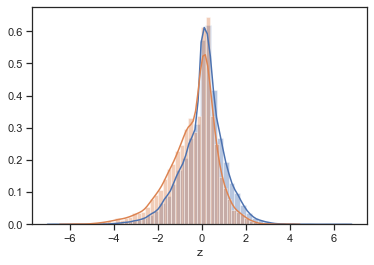

In [88]:
sns.set(style="ticks", color_codes=True)
sns.distplot(df_y["z"][df_y["true"] == 1], hist=True, label="Recommended")
sns.distplot(df_y["z"][df_y["true"] == 0], hist=True, label="Not Recommended")

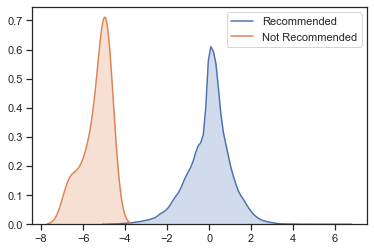

In [89]:
sns.set(style="ticks", color_codes=True)
sns.kdeplot(df_y["z"][df_y["predictions"] == 1], shade=True, label="Recommended")
sns.kdeplot(df_y["z"][df_y["predictions"] == 0], shade=True, label="Not Recommended")

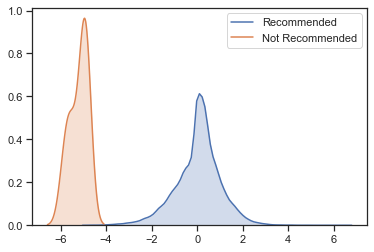

In [90]:
y = np.array(df_y["predictions"])
arr = np.concatenate((y.reshape([-1, 1]), true_y.reshape([-1, 1])), 1)
corrects = [i for i, x in enumerate(arr) if x[0] == x[1]]
corrects_pos = [i for i, x in enumerate(arr) if x[0] == x[1] and x[0] == 1]
corrects_neg = [i for i, x in enumerate(arr) if x[0] == x[1] and x[0] == 0]
sns.set(style="ticks", color_codes=True)
sns.kdeplot(df_y["z"][corrects_pos], shade=True, label="Recommended")
sns.kdeplot(df_y["z"][corrects_neg], shade=True, label="Not Recommended")

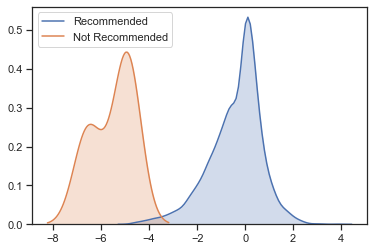

In [91]:
incorrects = [i for i, x in enumerate(arr) if x[0] == x[1]]
incorrects_pos = [i for i, x in enumerate(arr) if x[0] != x[1] and x[0] == 1]
incorrects_neg = [i for i, x in enumerate(arr) if x[0] != x[1] and x[0] == 0]
sns.set(style="ticks", color_codes=True)
sns.kdeplot(df_y["z"][incorrects_pos], shade=True, label="Recommended")
sns.kdeplot(df_y["z"][incorrects_neg], shade=True, label="Not Recommended")

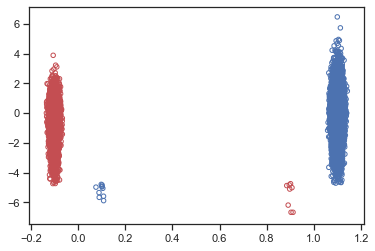

In [92]:
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

df_y["true"] = np.array([float(x) for x in df_y["true"]])
df_y["true"] = rand_jitter(np.array(df_y["true"]))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df_y["true"][corrects_pos]+0.1, df_y["z"][corrects_pos], marker="o", s=20, facecolors='none', edgecolors='b')
ax.scatter(df_y["true"][corrects_neg]+0.1, df_y["z"][corrects_neg], marker="o", s=20, facecolors='none', edgecolors='b')
ax.scatter(df_y["true"][incorrects_pos]-0.1, df_y["z"][incorrects_pos], marker="o", s=20, facecolors='none', edgecolors='r')
ax.scatter(df_y["true"][incorrects_neg]-0.1, df_y["z"][incorrects_neg], marker="o", s=20, facecolors='none', edgecolors='r')


In [ ]:
import seaborn as sns
df_y = pd.DataFrame(np.concatenate((arr, z.reshape(-1, 1)),1), columns=["predictions", "true", "z"])
sns.set(style="whitegrid")
g = sns.catplot(x="true", y="z", hue="predictions", data=df_y,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("z")

In [ ]:
import seaborn as sns
df_y = pd.DataFrame(np.concatenate((arr, z.reshape(-1, 1)),1), columns=["predictions", "true", "z"])
# sns.set(style="whitegrid")
g = sns.boxplot(x="true", y="z", hue="predictions", data=df_y, palette="muted")

In [ ]:
g = sns.violinplot(x="true", y="z", hue="predictions", data=df_y, palette="muted")

In [ ]:
import seaborn as sns
arr = np.concatenate((y.reshape([-1, 1]), true_y.reshape([-1, 1])), 1)
corrects = np.array([0 if x[0] == x[1] else 1 for i, x in enumerate(arr)])
recommends = np.array([0 if x[0] == 0 else 1 for i, x in enumerate(arr)])

df_y2 = pd.DataFrame(np.concatenate((corrects.reshape(-1, 1), 
                                    recommends.reshape(-1, 1), 
                                    z.reshape(-1, 1)),1), 
                    columns=["correct", "recommend", "z"])

sns.set(style="whitegrid")
g = sns.catplot(x="correct", y="z", hue="recommend", data=df_y2,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("z")

In [ ]:
g = sns.violinplot(x="correct", y="z", hue="recommend", data=df_y2, palette="muted")

In [ ]:
g = sns.boxplot(x="correct", y="z", hue="recommend", data=df_y2, palette="muted")

# SMOTE

In [ ]:
model = LinearDiscriminantAnalysis
models_100_lda, train_accuracies_100_lda, valid_accuracies_100_lda, \
    train_arr_100_lda, valid_arr_100_lda  = lda_cv(model, data_samples, true_y, 
                                                   n_features=100, cv=3, verbose=1, smote=True)
models_500_lda, train_accuracies_500_lda, valid_accuracies_500_lda, \
    train_arr_500_lda, valid_arr_500_lda  = lda_cv(model, data_samples, true_y, 
                                                   n_features=500, cv=3, verbose=1, smote=True)
models_1000_lda, train_accuracies_1000_lda, valid_accuracies_1000_lda, \
    train_arr_1000_lda, valid_arr_1000_lda  = lda_cv(model, data_samples, true_y, 
                                                   n_features=1000, cv=3, verbose=1, smote=True)
models_2000_lda, train_accuracies_2000_lda, valid_accuracies_2000_lda, \
    train_arr_2000_lda, valid_arr_2000_lda  = lda_cv(model, data_samples, true_y, 
                                                   n_features=2000, cv=3, verbose=1, smote=True)
models_5000_lda, train_accuracies_5000_lda, valid_accuracies_5000_lda, \
    train_arr_5000_lda, valid_arr_5000_lda  = lda_cv(model, data_samples, true_y, 
                                                   n_features=5000, cv=3, verbose=1, smote=True)
models_10000_lda, train_accuracies_10000_lda, valid_accuracies_10000_lda, \
    train_arr_10000_lda, valid_arr_10000_lda  = lda_cv(model, data_samples, true_y, 
                                                   n_features=10000, cv=3, verbose=1, smote=True)


In [ ]:
zeros = np.zeros(len(train_accuracies_1000_lda), dtype=np.int)
ones = np.ones(len(train_accuracies_1000_lda), dtype=np.int)
zeros_ones = np.concatenate((zeros, ones), 0).reshape([-1, 1])
zeros_ones.shape
ones1 = np.ones(len(zeros_ones), dtype=np.int).reshape([-1, 1])

In [ ]:
accuracies_100_lda = np.concatenate((np.array(train_accuracies_100_lda).reshape([-1, 1]), 
                                  np.array(valid_accuracies_100_lda).reshape([-1, 1])), 0)
accuracies_100_lda = np.concatenate((zeros_ones, ones1 * 100, accuracies_100_lda), 1)
accuracies_500_lda = np.concatenate((np.array(train_accuracies_500_lda).reshape([-1, 1]), 
                                  np.array(valid_accuracies_500_lda).reshape([-1, 1])), 0)
accuracies_500_lda = np.concatenate((zeros_ones, ones1 * 500, accuracies_500_lda), 1)
accuracies_1000_lda = np.concatenate((np.array(train_accuracies_1000_lda).reshape([-1, 1]), 
                                  np.array(valid_accuracies_1000_lda).reshape([-1, 1])), 0)
accuracies_1000_lda = np.concatenate((zeros_ones, ones1 * 1000, accuracies_1000_lda), 1)

accuracies_2000_lda = np.concatenate((np.array(train_accuracies_2000_lda).reshape([-1, 1]), 
                                  np.array(valid_accuracies_2000_lda).reshape([-1, 1])), 0)
accuracies_2000_lda = np.concatenate((zeros_ones, ones1 * 2000, accuracies_2000_lda), 1)

accuracies_5000_lda = np.concatenate((np.array(train_accuracies_5000_lda).reshape([-1, 1]), 
                                  np.array(valid_accuracies_5000_lda).reshape([-1, 1])), 0)
accuracies_5000_lda = np.concatenate((zeros_ones, ones1 * 5000, accuracies_5000_lda), 1)

accuracies_10000_lda = np.concatenate((np.array(train_accuracies_10000_lda).reshape([-1, 1]), 
                                  np.array(valid_accuracies_10000_lda).reshape([-1, 1])), 0)
accuracies_10000_lda = np.concatenate((zeros_ones, ones1 * 10000, accuracies_10000_lda), 1)


accuracies_lda = np.concatenate((accuracies_100_lda, 
                             accuracies_500_lda, 
                             accuracies_1000_lda, 
                             accuracies_2000_lda,
                             accuracies_5000_lda,
                             accuracies_10000_lda
                                ), 0)
accuracies_lda = pd.DataFrame(accuracies_lda, columns=["valid", "group", "acc"])

In [ ]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=[9, 6])
g = sns.violinplot(x="group", y="acc", 
                   hue="valid", data=accuracies_lda, 
                   palette="muted")
plt.show()

In [ ]:
valid_arr_2000_lda = np.concatenate((valid_arr_2000_lda))
heatconmat(valid_arr_2000_lda[:,0], valid_arr_2000_lda[:,1])

In [33]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=3,
                                   max_features=2000,
                                   stop_words='english')
tfidf_vectorizer.fit(data_samples.astype('U'))
all_data  = tfidf_vectorizer.transform(data_samples.astype('U')).toarray()

In [34]:
sm = SMOTE(random_state=42, n_jobs=-1)
X_res, Y_res  = sm.fit_resample(all_data , true_y)

In [35]:
flda_smote = LinearDiscriminantAnalysis(n_components=1, tol=0.001)
t0 = time()
z = flda_smote.fit_transform(X_res, Y_res)
print("done in %0.3fs." % (time() - t0))


done in 102.017s.


In [36]:
z = flda_smote.transform(all_data)
predict_y = flda_smote.predict(all_data)
arr = np.concatenate((predict_y.reshape([-1, 1]), true_y.reshape([-1, 1])), 1)
total = len(arr)
corrects = [i for i, x in enumerate(arr) if x[0] == x[1]]
print(len(corrects), "/", total, len(corrects)/total)
df_y = pd.DataFrame(np.concatenate((predict_y.reshape(-1, 1), true_y.reshape(-1, 1), z.reshape(-1, 1)),1), columns=["predictions", "true", "z"])
df_y

38084 / 59305 0.6421718236236404


predictions  true         z
0              0.0   1.0 -1.455094
1              1.0   1.0  1.161828
2              1.0   1.0  0.541549
3              1.0   1.0  1.578034
4              1.0   1.0  0.583867
...            ...   ...       ...
59300          1.0   1.0  0.443453
59301          1.0   1.0  0.986456
59302          1.0   1.0  1.004097
59303          0.0   1.0 -0.314018
59304          0.0   1.0 -1.455094

[59305 rows x 3 columns]

In [37]:
true_y2 = np.array(df_y["true"])
heatconmat(true_y2, predict_y)

              precision    recall  f1-score   support

         0.0       0.16      0.49      0.24      6832
         1.0       0.91      0.66      0.77     52473

    accuracy                           0.64     59305
   macro avg       0.53      0.58      0.50     59305
weighted avg       0.82      0.64      0.71     59305



In [38]:
tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names()).reshape([-1, 1])
coefs = flda_smote.coef_.reshape([-1, 1])
coefs = pd.DataFrame(np.concatenate((coefs, tfidf_feature_names), 1), columns=["coef", "feature_name"])

In [39]:
coefs["coef"] = np.array(coefs["coef"], dtype=np.float32)
coefs = coefs.sort_values(by=['coef'])
coefs[:20]

coef feature_name
438  -5.822858    depending
499  -5.748482           dr
1101 -5.558056        meant
1769 -4.745362       thrown
1541 -4.523391    selection
1858 -4.172522      useless
1220 -4.107311   objectives
62   -4.096398        admit
542  -3.771373    encounter
325  -3.668853       common
1013 -3.654118       likely
1716 -3.622859      systems
1018 -3.592132       linear
1471 -3.523940       reward
894  -3.481780     increase
265  -3.293472        carry
1074 -3.268424     majority
1389 -3.262791       quando
1223 -3.225576    obviously
125  -3.114744       asking

In [40]:
coefs = coefs.sort_values(by=['coef'], ascending=False)
coefs[:20]

coef feature_name
1068  4.517825       madden
1555  4.239031         sets
1282  4.109461         pena
1906  3.804686      warning
1386  3.799052          pve
1567  3.778383         shit
164   3.736764          bar
254   3.682943         cake
1031  3.620600      loadout
916   3.544762        isaac
1049  3.484718       losing
386   3.445130     creation
1959  3.441465      wouldnt
91    3.409004      amounts
1673  3.406471        steep
237   3.392995      buffalo
1025  3.373084        lives
200   3.353091       blocks
491   3.349775         dosh
1533  3.337089          sea

In [41]:
means = flda_smote.means_
means_df = pd.DataFrame(np.concatenate((means.reshape([2000, -1]), tfidf_feature_names), 1),
                        columns=["bad_reference", "good_reference", "feature_name"])

means_df["bad_reference"] = np.array(means_df["bad_reference"], dtype=np.float32)
means_df = means_df.sort_values(by=['bad_reference'], ascending=False)
means_df[:n_top_words]

bad_reference          good_reference feature_name
1352       0.096293    0.000311595625403607       prefer
352        0.071231   0.0001831206531833108     continue
1001       0.050212   0.0031311378521512853      legends
1          0.042321   0.0015383820239764834          000
1381       0.030980   0.0015126827368345092         push
381        0.021749   0.0009039827751918748     crashing
1527       0.017088    0.002374439017875151        score
1043       0.016077   0.0007137150496456635        looks
1355       0.015246   0.0015116541778887505      present
527        0.012797   0.0014100923043544116      edition
1887       0.012228   0.0035341102820388706         você
1659       0.010080    0.001493612389704099         star
355        0.010029   0.0009241626218079339     controls
1348       0.009997   0.0009584961049510677     powerful
1094       0.009544   0.0002931295542081083        mates
43         0.008945  0.00039931673282590964     accurate
1600       0.008341   0.0012237274336958238         skin
1840       0.008333   0.0019017458792362366       unlike
1375       0.008156   0.0007782839633736568         pull
1949       0.007923   0.0013780204771817602      working

In [42]:
means_df["good_reference"] = np.array(means_df["good_reference"], dtype=np.float32)
means_df = means_df.sort_values(by=['good_reference'], ascending=False)
means_df[:n_top_words]

bad_reference  good_reference feature_name
1373       0.001347        0.042569           ps
1349       0.000808        0.035495       powers
373        0.001047        0.032299        craft
1656       0.000821        0.026701        stand
1092       0.001100        0.026694  matchmaking
1505       0.000816        0.023589      russian
92         0.000748        0.022081        angry
349        0.000284        0.022039     constant
1073       0.001897        0.020276        major
656        0.000618        0.018491      finding
1473       0.000421        0.018068      rewards
505        0.000280        0.017570      driving
1711       0.002085        0.017238      survive
73         0.001547        0.015612        ainda
1125       0.000275        0.013575          meu
1657       0.000663        0.013518     standard
473        0.000288        0.012460     distance
1717       0.000604        0.010334          são
711        0.000820        0.010299       gaming
125        0.000254        0.009957       asking

In [43]:
z = flda_smote.transform(X_res)
predict_y = flda_smote.predict(X_res)
arr = np.concatenate((predict_y.reshape([-1, 1]), Y_res.reshape([-1, 1])), 1)
total = len(arr)
corrects = [i for i, x in enumerate(arr) if x[0] == x[1]]
print(len(corrects), "/", total, len(corrects)/total)
df_y = pd.DataFrame(np.concatenate((arr, z.reshape(-1, 1)),1), columns=["predictions", "true", "z"])
df_y

71700 / 104946 0.6832085072322909


predictions  true         z
0               0.0   1.0 -1.455094
1               1.0   1.0  1.161828
2               1.0   1.0  0.541549
3               1.0   1.0  1.578034
4               1.0   1.0  0.583867
...             ...   ...       ...
104941          0.0   0.0 -0.477304
104942          0.0   0.0 -0.084325
104943          1.0   0.0  2.070866
104944          1.0   0.0  0.785937
104945          0.0   0.0 -0.585308

[104946 rows x 3 columns]

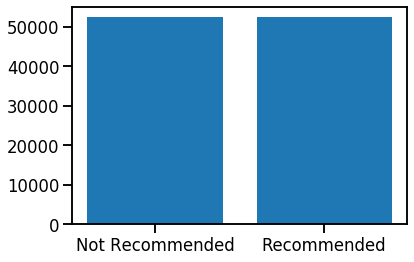

In [44]:
fig, ax = plt.subplots()
ax.bar([0,1], [len(df_y["true"]) - np.sum(df_y["true"]), np.sum(df_y["true"])])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Recommended", "Recommended"])
ax.grid(False)

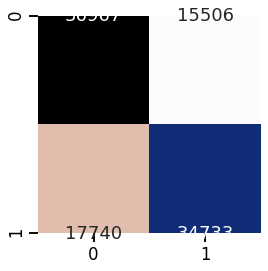

              precision    recall  f1-score   support

         0.0       0.68      0.70      0.69     52473
         1.0       0.69      0.66      0.68     52473

    accuracy                           0.68    104946
   macro avg       0.68      0.68      0.68    104946
weighted avg       0.68      0.68      0.68    104946



In [45]:
true_y2 = np.array(df_y["true"])
heatconmat(true_y2, predict_y)

In [46]:
tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names()).reshape([-1, 1])
coefs = flda_smote.coef_.reshape([-1, 1])
coefs = pd.DataFrame(np.concatenate((coefs, tfidf_feature_names), 1), columns=["coef", "feature_name"])

In [47]:
coefs["coef"] = np.array(coefs["coef"], dtype=np.float32)
coefs = coefs.sort_values(by=['coef'])
coefs[:20]

coef feature_name
438  -5.822858    depending
499  -5.748482           dr
1101 -5.558056        meant
1769 -4.745362       thrown
1541 -4.523391    selection
1858 -4.172522      useless
1220 -4.107311   objectives
62   -4.096398        admit
542  -3.771373    encounter
325  -3.668853       common
1013 -3.654118       likely
1716 -3.622859      systems
1018 -3.592132       linear
1471 -3.523940       reward
894  -3.481780     increase
265  -3.293472        carry
1074 -3.268424     majority
1389 -3.262791       quando
1223 -3.225576    obviously
125  -3.114744       asking

In [48]:
coefs = coefs.sort_values(by=['coef'], ascending=False)
coefs[:20]

coef feature_name
1068  4.517825       madden
1555  4.239031         sets
1282  4.109461         pena
1906  3.804686      warning
1386  3.799052          pve
1567  3.778383         shit
164   3.736764          bar
254   3.682943         cake
1031  3.620600      loadout
916   3.544762        isaac
1049  3.484718       losing
386   3.445130     creation
1959  3.441465      wouldnt
91    3.409004      amounts
1673  3.406471        steep
237   3.392995      buffalo
1025  3.373084        lives
200   3.353091       blocks
491   3.349775         dosh
1533  3.337089          sea

In [49]:
means = flda_smote.means_
means_df = pd.DataFrame(np.concatenate((means.reshape([n_features, -1]), tfidf_feature_names), 1),
                        columns=["bad_reference", "good_reference", "feature_name"])

means_df["bad_reference"] = np.array(means_df["bad_reference"], dtype=np.float32)
means_df = means_df.sort_values(by=['bad_reference'], ascending=False)
means_df[:n_top_words]

bad_reference          good_reference feature_name
1352       0.096293    0.000311595625403607       prefer
352        0.071231   0.0001831206531833108     continue
1001       0.050212   0.0031311378521512853      legends
1          0.042321   0.0015383820239764834          000
1381       0.030980   0.0015126827368345092         push
381        0.021749   0.0009039827751918748     crashing
1527       0.017088    0.002374439017875151        score
1043       0.016077   0.0007137150496456635        looks
1355       0.015246   0.0015116541778887505      present
527        0.012797   0.0014100923043544116      edition
1887       0.012228   0.0035341102820388706         você
1659       0.010080    0.001493612389704099         star
355        0.010029   0.0009241626218079339     controls
1348       0.009997   0.0009584961049510677     powerful
1094       0.009544   0.0002931295542081083        mates
43         0.008945  0.00039931673282590964     accurate
1600       0.008341   0.0012237274336958238         skin
1840       0.008333   0.0019017458792362366       unlike
1375       0.008156   0.0007782839633736568         pull
1949       0.007923   0.0013780204771817602      working

In [ ]:
means_df["good_reference"] = np.array(means_df["good_reference"], dtype=np.float32)
means_df = means_df.sort_values(by=['good_reference'], ascending=False)
means_df[:n_top_words]